In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats # for qq graph which tells about the distribution
from scipy.stats import skew

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
631,0,51.0,7.0542
813,0,6.0,31.2750
351,0,NaN,35.0000
246,0,25.0,7.7750
814,0,30.5,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_2072\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# check for the normal distribution

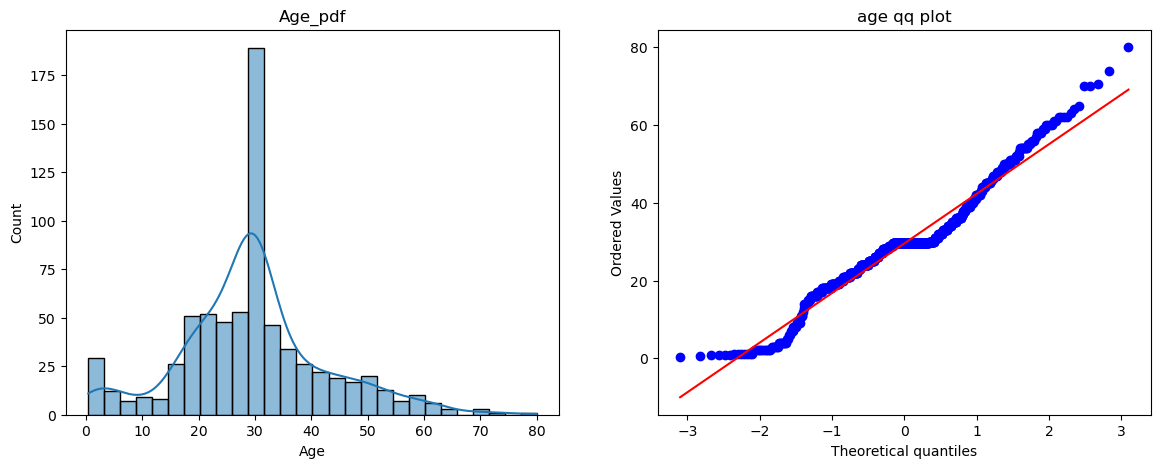

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(121)           # 1 for 1 row   # 2 for 2 cols   # 1 means first subplot 
sns.histplot(x_train['Age'],kde=True)
plt.title('Age_pdf')

plt.subplot(122)
stats.probplot(x_train['Age'],plot=plt,dist='norm')
plt.title("age qq plot")

plt.show()

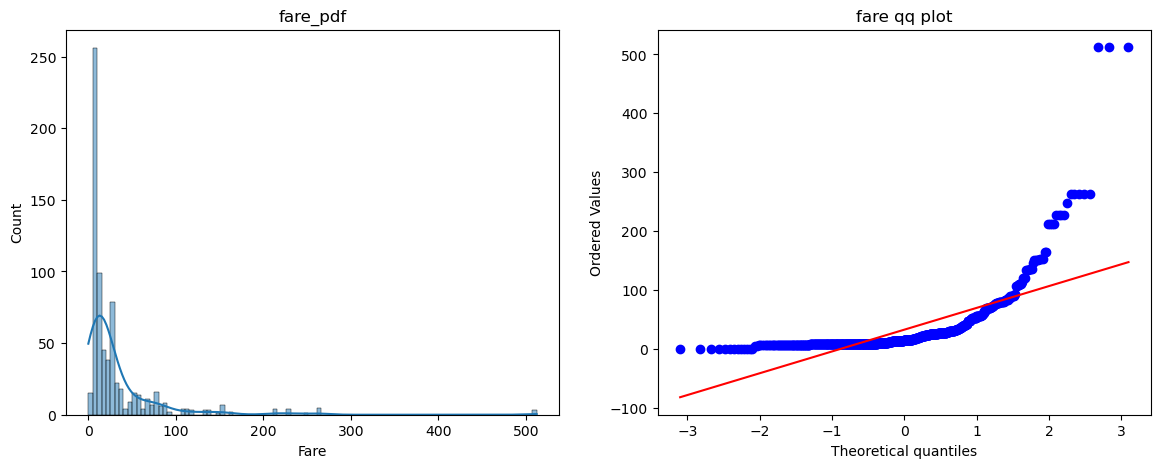

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(121)           # 1 for 1 row   # 2 for 2 cols   # 1 means first subplot 
sns.histplot(x_train['Fare'],kde=True)
plt.title('fare_pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'],plot=plt,dist='norm')
plt.title("fare qq plot")

plt.show()

In [11]:


skew(x_train['Fare'])

np.float64(4.864789051551803)

In [12]:
x_train['Fare'].skew()

np.float64(4.875065571137606)

# positively skewed so apply log transformer but in next step we dont have applied transformer 

In [13]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


In [14]:
# train
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred_1=clf2.predict(x_test)

acc_sc=accuracy_score(y_test,y_pred)
acc_sc_1=accuracy_score(y_test,y_pred_1)

print(f"accuracy_score of logistic regrssion algo without log transformer {acc_sc}")
print(f"accuracy_score of decision tree classifier algo without log transformer {acc_sc_1}")


accuracy_score of logistic regrssion algo without log transformer 0.6480446927374302
accuracy_score of decision tree classifier algo without log transformer 0.6703910614525139


# now we are going to apply the log transformer

In [15]:
trf=FunctionTransformer(func=np.log1p)    # np.log1p iska matlab hai it wil add 1 to the value before applying the log transformer as if there zero we cant apply log so we have to +1 but if you are sure that you dont have zeros in your datset so you can apply np.log 

In [16]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [17]:
clf3=LogisticRegression()
clf4=DecisionTreeClassifier()

In [18]:
clf3.fit(x_train_transformed,y_train)
clf4.fit(x_train_transformed,y_train)

y_pred_2=clf3.predict(x_test_transformed)
y_pred_3=clf4.predict(x_test_transformed)

acc_sc_2=accuracy_score(y_pred,y_test)
acc_sc_3=accuracy_score(y_test,y_pred)

print(f"after transformation the logistic regression performance is {acc_sc_2}")
print(f"after transformation the decision tree classifire performance is {acc_sc_3}")



after transformation the logistic regression performance is 0.6480446927374302
after transformation the decision tree classifire performance is 0.6480446927374302


# commonly decission tree classifire nu koi fark ni penda distribution to and logistic regression performane increase ho jande aa

# appa train test split te nhi reh sakde ode prose te so sanu cross validation vi karni chidi aa

In [19]:
x_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("dtf",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))


LR 0.678027465667915
dtf 0.6588389513108613


<Figure size 1400x500 with 0 Axes>

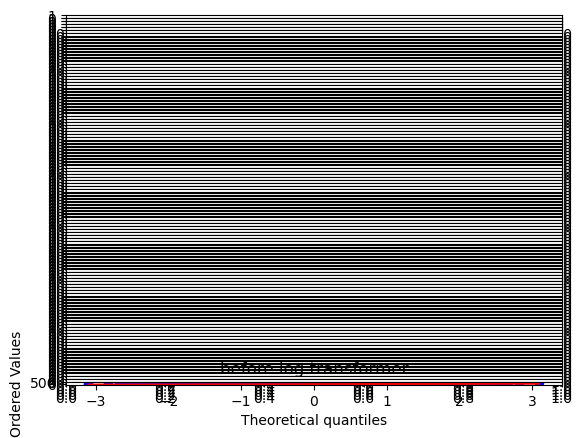

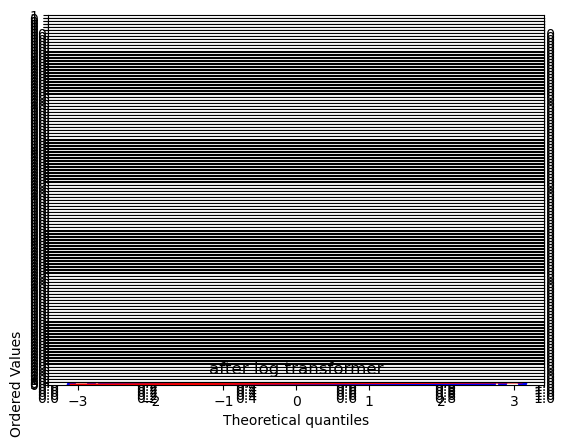

In [20]:
plt.figure(figsize=(14,5))
plt.subplots(121)
stats.probplot(x_train['Fare'],plot=plt,dist="norm")
plt.title('before log transformer')

plt.subplots(122)
stats.probplot(x_train_transformed['Fare'],plot=plt,dist="norm")
plt.title("after log transformer")
plt.show()

<Figure size 1400x500 with 0 Axes>

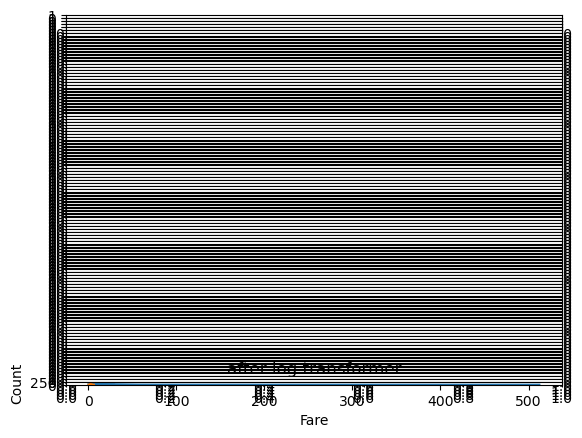

In [21]:
plt.figure(figsize=(14,5))
plt.subplots(121)

sns.histplot(x_train['Fare'],kde=True)
plt.title("before log algo")

sns.histplot(x_train_transformed['Fare'],kde=True)
plt.title("after log transformer")

plt.show()